# Maquina Soporte Vectorial

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

import numpy as np 

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

import warnings
warnings.simplefilter('ignore')

###### Concepto de linealmente separable

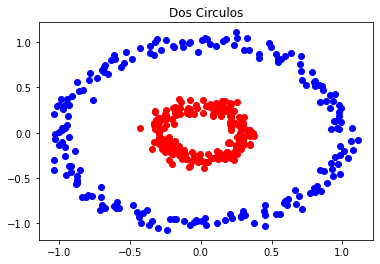

In [2]:
# Datos
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 


# plot de los circulos
plt.title('Dos Circulos')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   # 'ro' es color rojo y marker 'o'
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.show()

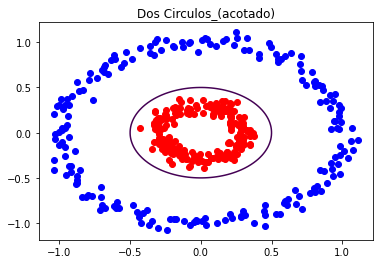

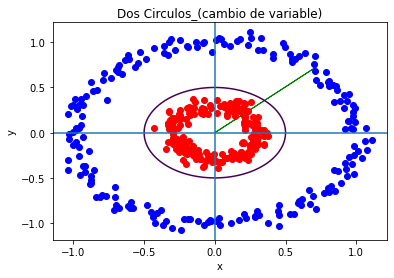

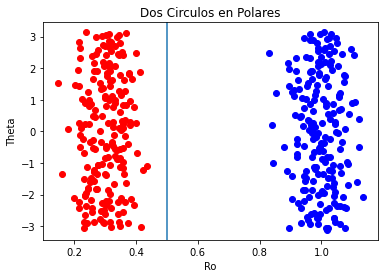

In [3]:
# plot de los circulos con el umbral 

plt.title('Dos Circulos_(acotado)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
x=np.linspace(-1.0, 1.0, 100)  # para circunferencia umbral
y=np.linspace(-1.0, 1.0, 100)
z, t=np.meshgrid(x,y)
F=(z)**2+(t)**2-0.25
plt.contour(z,t,F,[0])
plt.show();


# Para polares
plt.title('Dos Circulos_(cambio de variable)')
plt.plot(X[c_interno, 0], X[c_interno, 1], 'ro')   
plt.plot(X[c_externo, 0], X[c_externo, 1], 'bo')
plt.axvline(x=0.0)  # sistema coordenadas
plt.axhline(y=0.0)
plt.arrow(0,0,0.72,0.73, color='g')  # vector
plt.contour(z,t,F,[0])    # circunferencia r=0.5
plt.xlabel('x')
plt.ylabel('y')

# En polares
X, y=make_circles(n_samples=400, factor=.3, noise=.05)


def polar_carte(ro, theta):  # definicion coordenadas polares, convierte polares en cartesianas
    x=ro*np.cos(theta)
    y=ro*np.sin(theta)
    return(x, y)

def carte_polar(x, y):       # convierte cartesianas en polares
    ro=np.sqrt(x**2+y**2)
    theta=np.arctan2(y, x)
    return(ro, theta)


# plot en polares
c_interno=y==1  # etiqueta circulo interno 
c_externo=y==0  # etiqueta circulo externo 
plt.figure(5)
plt.title('Dos Circulos en Polares')
plt.plot(carte_polar(X[c_interno, 0], X[c_interno, 1])[0],carte_polar(X[c_interno, 0], X[c_interno, 1])[1], 'ro')    # circulo interno
plt.plot(carte_polar(X[c_externo, 0], X[c_externo, 1])[0], carte_polar(X[c_externo, 0], X[c_externo, 1])[1], 'bo')   # circulo externo
plt.axvline(x=0.5)          # umbral, recta vertical en x=0.5
plt.xlabel('Ro')
plt.ylabel('Theta')
plt.show();

**Kernel Trick**

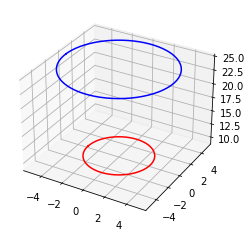

In [4]:
ang=np.linspace(-np.pi, np.pi, 200)


x=3*np.cos(ang)
y=3*np.sin(ang)
z=x**2 + y**2  


x_1=5*np.cos(ang)
y_1=5*np.sin(ang)
z_1=x_1**2 + y_1**2


fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(x, y, z, color='r')
ax.plot(x_1, y_1, z_1, color='b')
plt.show();

###### SVM

![svm](../images/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

**Función a minimizar**

$$[\frac{1}{n}\sum_{i=1}^{n}max(0, 1-y_i(\vec{\omega}\vec{x}-b))] + \lambda \|\vec{\omega}\|$$

In [5]:
from sklearn.svm import SVR  # Support Vector Regressor

In [6]:
boston=load_boston()

X=boston.data

y=boston.target

X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [7]:
svr=SVR()
svr.fit(X_train, y_train)
#y_pred=svr.predict(X_test)

train_score=svr.score(X_train, y_train)    # R2
test_score=svr.score(X_test, y_test)

print(train_score, test_score)

0.21380811986288784 0.1480656151579538


In [8]:
from sklearn.metrics import r2_score

In [9]:
y_pred_train=svr.predict(X_train)

y_pred_test=svr.predict(X_test)

In [10]:
r2_score(y_train, y_pred_train)

0.21380811986288784

In [11]:
r2_score(y_test, y_pred_test)

0.1480656151579538